In [1]:
# conda install requests

In [2]:
import requests
import json
import time
import pandas as pd

In [1]:
API_KEY = 'KEY_SECRET'
USER_AGENT = 'USER_NAME'

In [4]:
# how long to pause between consecutive API requests
pause_duration = 0.3

In [5]:
import requests

url = 'http://ws.audioscrobbler.com/2.0/?method=user.get{}&user={}&api_key={}&format=json'

limit = 200 #api lets you retrieve up to 200 records per call
extended = 0 #api lets you retrieve extended data for each track, 0=no, 1=yes
page = 1 #page of results to start retrieving at


In [6]:
method = 'toptracks'
request_url = url.format(method, USER_AGENT, API_KEY, limit, extended, page)
artist_names = []
track_names = []
play_counts = []
response = requests.get(request_url).json()
for item in response[method]['track']:
    artist_names.append(item['artist']['name'])
    track_names.append(item['name'])
    play_counts.append(item['playcount'])

top_tracks = pd.DataFrame()
top_tracks['artist'] = artist_names
top_tracks['track'] = track_names
top_tracks['play_count'] = play_counts
top_tracks.to_csv('lastfm_top_tracks.csv', index=None, encoding='utf-8')
top_tracks.head(10)

,artist,track,play_count
0,La Maravillosa Orquesta del Alcohol,La vuelta,12
1,Jarabe de Palo,Tú Mandas,7
2,Harry Styles,To Be So Lonely,6
3,Harry Styles,Watermelon Sugar,6
4,Harry Styles,Golden,5
5,Harry Styles,Treat People with Kindness,5
6,La Maravillosa Orquesta del Alcohol,Conduciendo y Llorando,3
7,Adele,Someone Like You,2
8,Harry Styles,She,2
9,John Legend,God Only Knows (feat. yMusic),2


In [7]:
response['toptracks']['@attr']

{'page': '1',
 'perPage': '50',
 'user': 'pabloferro',
 'total': '42',
 'totalPages': '1'}

In [8]:
tracks_n=[]
for item in response[method]['track']:
    tracks_n.append(item['name'])
    
tracks_n

['La vuelta',
 'Tú Mandas',
 'To Be So Lonely',
 'Watermelon Sugar',
 'Golden',
 'Treat People with Kindness',
 'Conduciendo y Llorando',
 'Someone Like You',
 'She',
 'God Only Knows (feat. yMusic)',
 'Where is my mind',
 'Leyenda',
 'Purple Rain',
 'Set Fire to the Rain',
 'How Many Fucks?',
 'Límite',
 'El Conticinio',
 'Falling',
 'Fine Line',
 'From the Dining Table',
 'Kiwi',
 'Sweet Creature',
 '¡Yep!',
 'Déjame Vivir - Versión 50 Palos',
 'Grita',
 'Grita - Versión Filarmónica',
 'Hombrecitos',
 'Hoy No Soy Yo',
 'La Vida Es el Momento',
 'Me Flechaste Ingrata',
 'Misteriosamente Hoy',
 'Que Bueno - Versión 50 Palos',
 'Qué Bueno, Qué Bueno (feat. Jorge Drexler)',
 'Tragas o Escupes',
 'Darkest Hour',
 '93compases',
 'Héroes del Sábado',
 'Shallow',
 'Remember Me (Dúo)',
 'Volver - Bonus Track',
 'Raspberry Beret',
 'Trampoline (with ZAYN)']

In [9]:
method = 'topartists'
request_url = url.format(method, USER_AGENT, API_KEY, limit, extended, page)
artist_names = []
play_counts = []
response = requests.get(request_url).json()
for item in response[method]['artist']:
    artist_names.append(item['name'])
    play_counts.append(item['playcount'])

top_art = pd.DataFrame()
top_art['artist'] = artist_names
top_art['play_count'] = play_counts
top_art.to_csv('lastfm_top_artists.csv', index=None, encoding='utf-8')
top_art.head(10)

,artist,play_count
0,Harry Styles,26
1,Jarabe de Palo,19
2,La Maravillosa Orquesta del Alcohol,17
3,Adele,3
4,Prince,3
5,John Legend,2
6,Maxence Cyrin,2
7,NACH,2
8,Erika Jayne,1
9,Feten Feten,1


In [10]:
method = 'toptags'
request_url = url.format(method, USER_AGENT, API_KEY, limit, extended, page)
tags=[]
play_count=[]
response = requests.get(request_url).json()

for item in response[method]['tag']:
    tags.append(item['tags'])
    play_count.append(item['playcount'])

top_tags = pd.DataFrame()
top_tags['tag'] = tags
top_tags['play_count'] = play_count
top_tags.to_csv('lastfm_top_tags.csv', index=None, encoding='utf-8')
top_tags.head(10)

,tag,play_count


In [11]:
import matplotlib.pyplot as plt

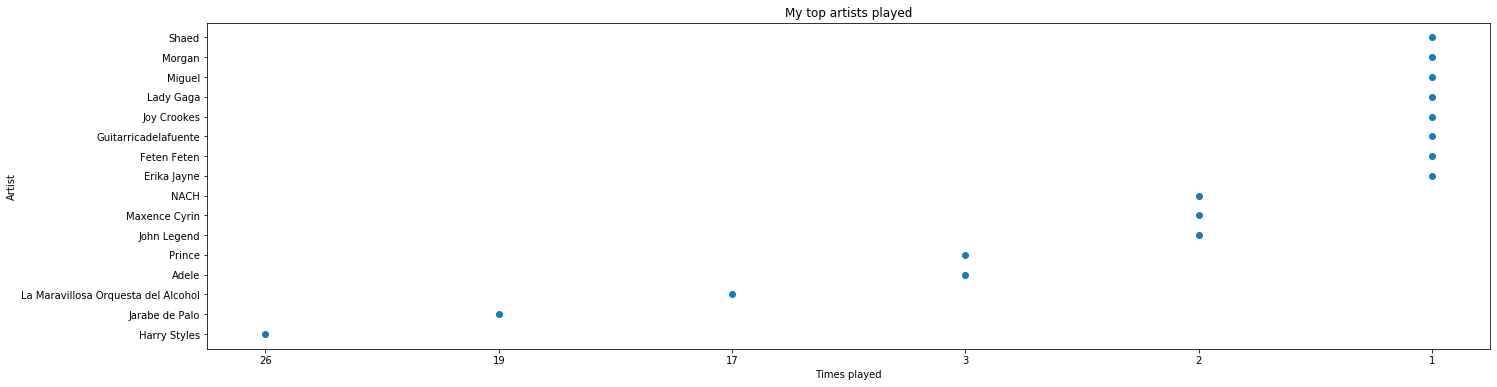

In [18]:
plt.figure(figsize=(23,6))
plt.plot(top_art.play_count,top_art.artist,'o')
plt.xlabel('Times played')
plt.ylabel('Artist')
plt.title('My top artists played')
plt.savefig('top_artists_chart_12dic.png')
plt.show()

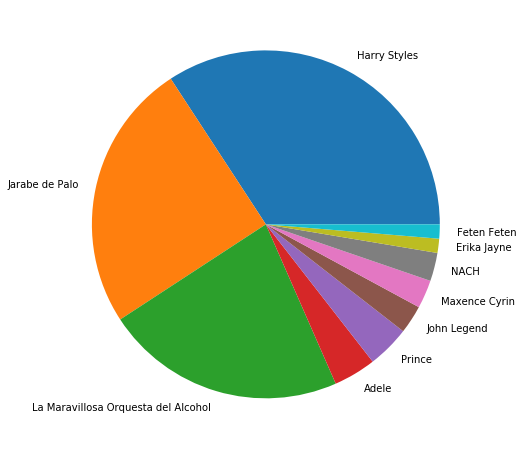

In [19]:
top_art10=top_art.head(10)
plt.figure(figsize=(8,8))
plt.pie(top_art10.play_count,labels=top_art10.artist)
plt.savefig('piechart.png')